In [11]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile


# 3a)

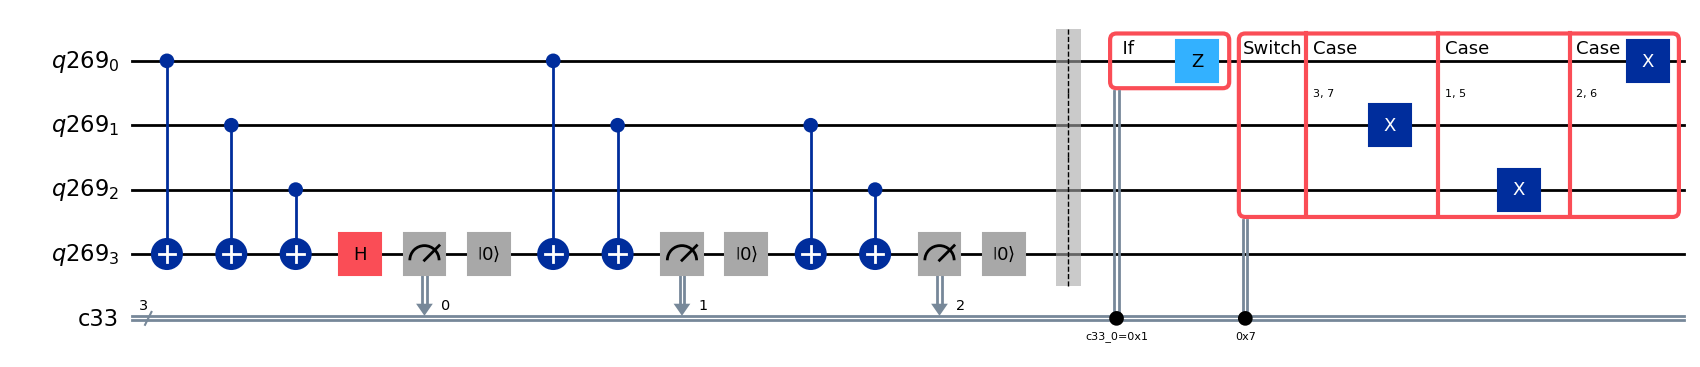

In [12]:
def make_m_rounds_ghz(m, prepareGHZ):
    for _ in range(m):
        qubits = QuantumRegister(4)
        clbits = ClassicalRegister(3)
        qc = QuantumCircuit(qubits, clbits)
        (q0,q1,q2, q3) = qubits
        (c0,c1,c2) = clbits
        
        if prepareGHZ:
            qc.h(q0)
            qc.cx([q0,q1],[q1,q2])
        
        # S1
        qc.cx([q0,q1,q2],q3)
        qc.h(q3)
        qc.measure(q3,c0)
        qc.reset(q3)
        # S2
        qc.cx([q0,q1],q3)
        qc.measure(q3,c1)
        qc.reset(q3)
        # S3
        qc.cx([q1,q2],q3)
        qc.measure(q3,c2)
        qc.reset(q3)
        qc.barrier()
        with qc.if_test((c0,1)):
            qc.z(q0)
        
        with qc.switch(clbits) as case:
            with case(0b011,0b111):
                qc.x(q1)
            with case(0b001,0b101):
                qc.x(q2)
            with case(0b010,0b110):
                qc.x(q0)    
        
    return qc

make_m_rounds_ghz(2, prepareGHZ=False).draw('mpl')


Theory Question: X error position are derived from the switch case, and Z errors are position independant

# b) + c)

In [13]:
from qiskit_ibm_provider import IBMProvider

file_token = open("ibm_token_felix.txt")
token = file_token.read()
file_token.close()

IBMProvider.save_account(overwrite=True, token=token)
provider = IBMProvider()


name = 'ibm_kyoto'
backend = provider.get_backend(name)

In [14]:
qcs_b = []
for m in [1,2,3,10,20]:
    qcs_b.append(transpile(make_m_rounds_ghz(2, prepareGHZ=False), backend=backend, initial_layout=[19,21,33,20]))


In [15]:
#job = backend.run(qcs_b, shots = 500)
job_id = "csr83qyvwqp0008by9xg"

(no plots)

# d)

(no solution)

# 4)

In [16]:
from qiskit import transpile
qcs_4 = []
for m in [1,2,3,10,20]:
    qcs_4.append(transpile(make_m_rounds_ghz(2, prepareGHZ=True), backend=backend, initial_layout=[19,21,33,20]))

In [18]:
#job = backend.run(qcs_4, shots = 500)
job_id = "csr86a1vnxy0008e9330"